In [76]:
#Importing the libraries.
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline 

In [77]:
#Get the csv data
train = read_csv("train.csv",sep=',',index_col=None)
test = read_csv("test.csv",sep=',',index_col=None)

# replace NaN value! If string column, then using A otherwise 0
for col in train:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna('')
    else:
        train[col] = train[col].fillna(0)     

   
    train.shape

In [78]:
train.head(24)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,,,,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,,,,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,,,,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,,,,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,,,,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,,,,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,,,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,,,,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,,,,0,1,2008

In [79]:
#Encode the value for the string column
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)
trainColumns = list(train.columns.values)
trainColumns

encoder = LabelEncoder()
for col in train:
    if train[col].dtype == 'object':
        train[col] = encoder.fit_transform(train[col]) 
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,196.0,2,4,2,3,4,4,3,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,2,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,3,4,2,1,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,162.0,2,4,2,3,4,3,3,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,2,4,1,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,350.0,2,4,2,3,4,1,3,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,0,0,0,12,2008,8,4,250000


In [82]:
#Find the column which are correlated  
corr = train.corr(method='pearson')
corr = corr.sort_values('SalePrice')

correlatedCol = corr['SalePrice'][corr['SalePrice'].values > 0.2].index.values
columnToDrop = list(set(trainColumns) - set(correlatedCol))

print(corr['SalePrice'])
print("columns to keep:",correlatedCol)
#correlatedCol
print("columns to delete:",columnToDrop)

ExterQual       -0.636884
KitchenQual     -0.589189
BsmtQual        -0.438881
HeatingQC       -0.400178
GarageFinish    -0.292483
LotShape        -0.255580
GarageType      -0.223819
BsmtExposure    -0.193079
Fence           -0.181911
MSZoning        -0.166872
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
Heating         -0.098812
Alley           -0.092607
BldgType        -0.085591
MSSubClass      -0.084284
OverallCond     -0.077856
MiscFeature     -0.069317
LotConfig       -0.067396
SaleType        -0.054911
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
Utilities       -0.014314
BsmtFinType1    -0.013233
BsmtFinSF2      -0.011378
MasVnrType      -0.000488
Condition2       0.007513
LandContour      0.015453
Street           0.041036
3SsnPorch        0.044584
MoSold           0.046432
LandSlope        0.051152
PoolQC           0.051364
Condition1       0.091155
PoolArea         0.092404
Exterior1st 

In [83]:
# Drop the columns 
train = train.drop(columnToDrop,axis=1)

train.shape

(1460, 33)

In [84]:
train.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,65.0,8450,5,7,2003,2003,1,196.0,2,706,150,856,1,5,856,854,1710,1,2,1,8,0,0,2003.0,2,548,5,5,2,0,61,4,208500
1,80.0,9600,24,6,1976,1976,1,0.0,1,978,284,1262,1,5,1262,0,1262,0,2,0,6,1,5,1976.0,2,460,5,5,2,298,0,4,181500
2,68.0,11250,5,7,2001,2002,1,162.0,2,486,434,920,1,5,920,866,1786,1,2,1,6,1,5,2001.0,2,608,5,5,2,0,42,4,223500
3,60.0,9550,6,7,1915,1970,1,0.0,0,216,540,756,1,5,961,756,1717,1,1,0,7,1,3,1998.0,3,642,5,5,2,0,35,0,140000
4,84.0,14260,15,8,2000,2000,1,350.0,2,655,490,1145,1,5,1145,1053,2198,1,2,1,9,1,5,2000.0,3,836,5,5,2,192,84,4,250000


In [85]:
from sklearn.model_selection import train_test_split
# Split-out validation dataset
X = train.iloc[:, 0:32].values
Y = train.iloc[:,32].values
X_Test = test.iloc[:,0:32].values
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=42)
print(X)
Y
print(X_validation)
print(validation_size)

[[6.500e+01 8.450e+03 5.000e+00 ... 0.000e+00 6.100e+01 4.000e+00]
 [8.000e+01 9.600e+03 2.400e+01 ... 2.980e+02 0.000e+00 4.000e+00]
 [6.800e+01 1.125e+04 5.000e+00 ... 0.000e+00 4.200e+01 4.000e+00]
 ...
 [6.600e+01 9.042e+03 6.000e+00 ... 0.000e+00 6.000e+01 4.000e+00]
 [6.800e+01 9.717e+03 1.200e+01 ... 3.660e+02 0.000e+00 4.000e+00]
 [7.500e+01 9.937e+03 7.000e+00 ... 7.360e+02 6.800e+01 4.000e+00]]
[[7.0000e+01 8.4140e+03 1.9000e+01 ... 1.9200e+02 0.0000e+00 4.0000e+00]
 [9.8000e+01 1.2256e+04 1.5000e+01 ... 1.8600e+02 3.2000e+01 4.0000e+00]
 [5.6000e+01 8.9600e+03 1.7000e+01 ... 0.0000e+00 0.0000e+00 4.0000e+00]
 ...
 [6.3000e+01 8.1990e+03 5.0000e+00 ... 3.6000e+01 1.8000e+01 4.0000e+00]
 [6.0000e+01 9.0840e+03 7.0000e+00 ... 1.2000e+02 0.0000e+00 4.0000e+00]
 [7.0000e+01 8.1200e+03 1.2000e+01 ... 0.0000e+00 0.0000e+00 4.0000e+00]]
0.2


In [88]:
# fit the model 
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
# Predict on the test data: y_pred
y_pred = model.predict(X_validation)
score = np.mean((Y_validation - y_pred) ** 2)
print(X_validation)
print(y_pred)
print("score",score)

[[7.0000e+01 8.4140e+03 1.9000e+01 ... 1.9200e+02 0.0000e+00 4.0000e+00]
 [9.8000e+01 1.2256e+04 1.5000e+01 ... 1.8600e+02 3.2000e+01 4.0000e+00]
 [5.6000e+01 8.9600e+03 1.7000e+01 ... 0.0000e+00 0.0000e+00 4.0000e+00]
 ...
 [6.3000e+01 8.1990e+03 5.0000e+00 ... 3.6000e+01 1.8000e+01 4.0000e+00]
 [6.0000e+01 9.0840e+03 7.0000e+00 ... 1.2000e+02 0.0000e+00 4.0000e+00]
 [7.0000e+01 8.1200e+03 1.2000e+01 ... 0.0000e+00 0.0000e+00 4.0000e+00]]
[151940.36423755 306967.47422492 118636.30466425 172024.13448828
 312004.70789487  78158.72773604 224679.49836711 158499.9023346
  74598.0069514  116694.97810857 144092.10942114 106051.13602224
  89783.44416281 204893.27550896 170128.80830899 122990.74395695
 207072.14417555 116463.71511221 114337.60191791 221035.2831581
 178843.37374111 218746.46995768 182192.78494495 111541.78419275
 204313.86683129 163708.19878858 193943.95765056  83748.28810361
 174978.46351467 201311.22465231 121618.86819467 274453.22422553
 205917.89579955  78469.6645326  26964

In [90]:
# Compute and print RMSE, Lower the rmse better the prediction
rmse = np.sqrt(mean_squared_error(Y_validation,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 37105.071230789865


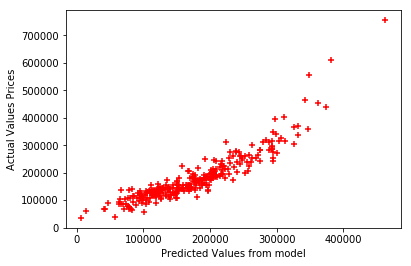

In [91]:
plt.scatter(y_pred, Y_validation, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Values Prices")
plt.show()